# Machine Learning
Aprendizaje Automatico 
Buscar desarrollar Software capaz de reconocer patrones dentro de un conjunto de datos, para posteriormente realizar un aprendizaje y por ultimo poder construir un modelo que represente dicho conjunto.

- Set datos
- Algortimo de Prediccion
- Entrenar el Modelo
- Predicciones

# Modelo en ML 
Es una expresion de un algoritmo que analiza montaña de datos para encontrar patrones o realizar predicciones, impulsado por los datos , los Modelos de ML son los motores matematicos de la IA


# Entrenamiento de un Modelo
Consiste en proporcionar datos de entrenamiento de los cuales puede aprender a un algortimo de ML. el termino modelo de ML 
se refiere al artefacto de modelo que se crera en el proceso de entrenamiento

# Regresion Lineal
Metodo Matematico que modela la relacion entre una variable independiente "x" y una variable dependiente "y" por medio de una expresion lineal que busca asemajarse en medida a los datos reales para las predicciones.
Una Regresion Lineal se utiliza para generar predicciones sonre una variable numerica que llamamos la variable dependiente.
Generalmente denonimada con una Y.
Siempre debe ser numericas ejm: Precios de Casa, estauras,la ditancia de los planetas etc


<img src="RegLin.png"/>

# Ejercicio de Prediccion
Intenraremos predecir cuantas veces sera compartido en redes sociales un articulo de ML segun algunas de sus caracteristicas Prediccion ¿Cuantas veces sera compartido un articulo del Blog?

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn import linear_model
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
from sklearn.metrics import mean_squared_error, r2_score


In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Cargamos los datos de entrada
data = pd.read_csv("./articulos_ml.csv")

In [5]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [6]:
#Veamos cuantos dimensiones y registros contiene
data.shape

(161, 8)

In [7]:
#Ahora veamos algunas estadisticas
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


La Columna Shares sera nuestra salida , es decir nuestro valor "Y" el valor que queremos predecir

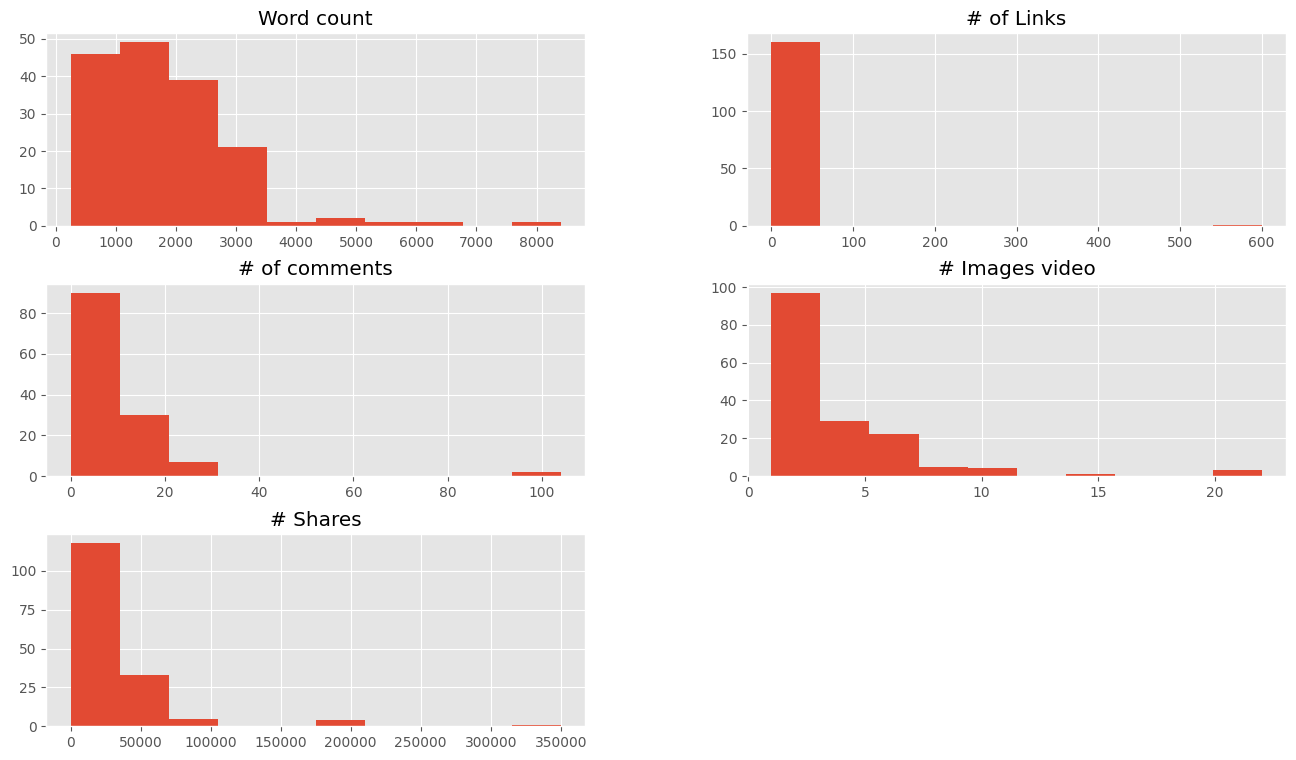

In [8]:
#Visualizar rapidamente las caracteristicas de entrada
data.drop(['Title','url','Elapsed days'],1).hist()
plt.show()

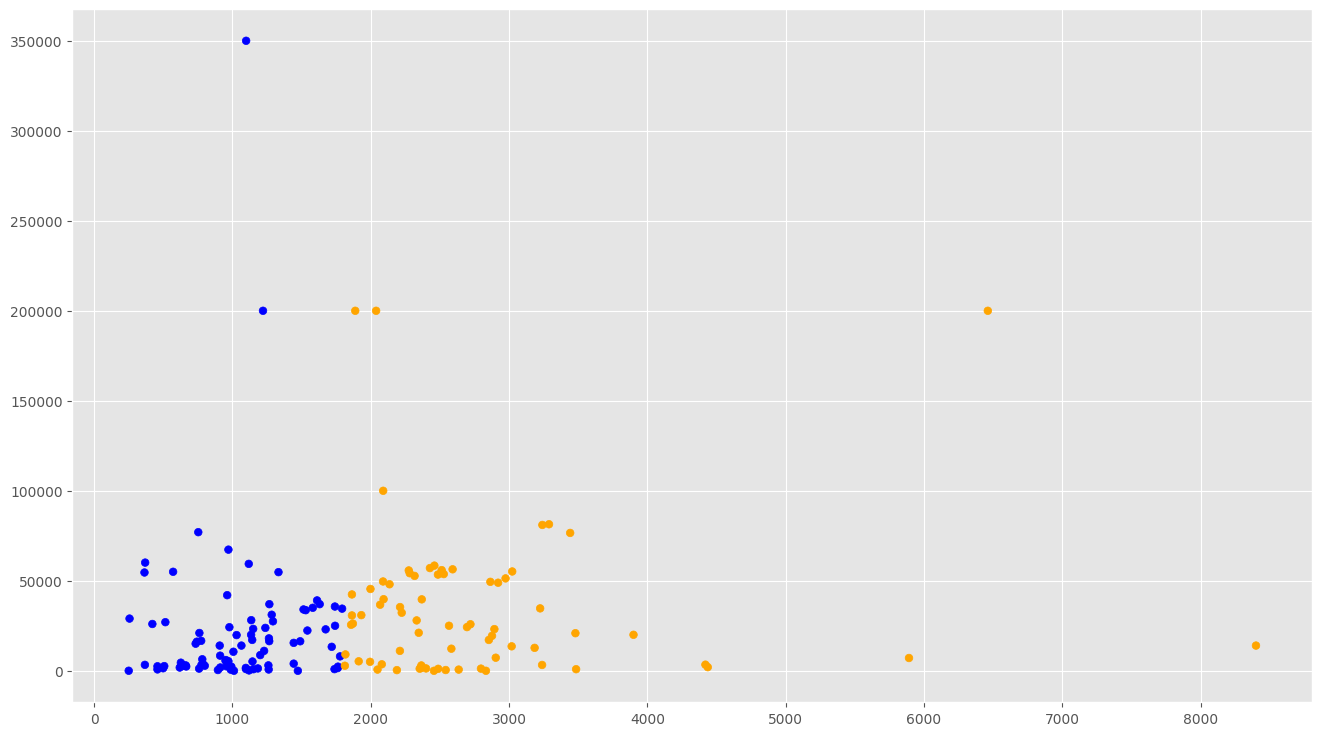

In [11]:
#Vamos a visualizar los datos de entrada
colores =['orange','blue']
tamanios=[30,60]

f1 = data['Word count'].values
f2 = data['# Shares'].values

asignar=[]
for index , row in data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
plt.scatter(f1,f2,c=asignar,s=tamanios[0])        
plt.show()

# Regresion Lineal
Regresion Lineal con Una Solo Variable

In [20]:
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]
#Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas y
dataX=filtered_data[['Word count']]
X_train=np.array(dataX)
y_train=filtered_data[['# Shares']].values

In [22]:
#Creamos el Objeto de Regresion Lineal
regr=linear_model.LinearRegression()

In [23]:
#Entrenamos nuestro modelo
regr.fit(X_train,y_train)

LinearRegression()

In [24]:
#Hacemos la predicciones que en definitiva una linea
y_pred=regr.predict(X_train)

In [28]:
#Veamos los coeficientes obtenidos en nuestro caso , Seran la tangente
print("Coeficientes:\n" ,regr.coef_)

Coeficientes:
 [[5.69765366]]


In [31]:
#El Mejor puntaje
print('El mejor puntaje: %.2f' % r2_score(y_train, y_pred))

El mejor puntaje: 0.06


In [53]:
#Entrenamos eñ modelo esta vez con 2 dimensiones
dataX2=pd.DataFrame()

dataX2["Word count"] =filtered_data["Word count"]

XY_train=np.array(dataX2)
z_train=filtered_data["# Shares"].values


#Creamos un nuevo objeto de regresion lineal
regr2 = linear_model.LinearRegression()

regr2.fit(XY_train,z_train)


predcc1=regr2.predict(XY_train)
predcc1

# Quiero predecir cuantos "Shares" voy obtener por un articulo con: 2000 palabras y con enlaces:10, 
#cometarios 4,images:6 segun nuestro modelo

#predcc1=regr2.predict([[2000,10+4+6]])
         


array([21125.61589425, 16681.44604148, 15536.21765635, 15490.63642709,
       17570.28001204, 20208.29365541, 12658.90255937, 18419.23040699,
       16732.7249244 , 13302.73742265, 14818.31329552, 20493.17633828,
       14453.66346144, 18795.27554837, 13274.24915436, 14134.59485663,
       17667.14012421, 14994.9405589 , 15684.35665144, 13599.01541284,
       17268.30436819, 16373.77274398, 18379.34683139, 16613.07419759,
       21233.87131374, 16390.86570496, 16732.7249244 , 13809.82859816,
       13809.82859816, 15655.86838315, 23051.42283044, 12624.71663742,
       21245.26662105, 14903.77810038, 17946.32515342, 16652.9577732 ,
       14772.73206626, 16299.70324644, 17450.62928523, 18390.7421387 ,
       21102.82527962, 21530.14930392, 24874.67200081, 14972.14994427,
       15758.42614899, 13291.34211534, 14089.01362737, 16852.3756512 ,
       14043.43239811, 14727.150837  , 17764.00023639, 24663.85881549,
       16829.58503658, 15524.82234903, 17456.32693889, 27136.64050279,
      

In [54]:
dataX =filtered_data[["Word count"]]

In [55]:
X_train = np.array(dataX)

In [56]:
y_train = filtered_data['# Shares'].values

In [57]:
#Creamos el objeto de Regresion Lineal
regr = linear_model.LinearRegression()

In [58]:
#Entrenamos el Modelo con 2 dimensiones
regr.fit(X_train, y_train)

LinearRegression()

In [59]:
#Hacemos la Prediccion
y_pred = regr.predict(X_train)

In [62]:
#Quiero predecir cuantos "Shares voy a obtener por un articulo con 2000 poalabras
predic02=regr.predict([[2000]])
print(int(predic02))

22595


# Vamos a mejorar el modelo  con una dimenison mas , para poder graficar en 3D , haremos una variable nueva que sera la suma de los enlaces,comentarios e imagenes

In [63]:
#Variable Nueva
suma=(filtered_data["# of Links"] +  filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

In [64]:
dataX2=pd.DataFrame()

In [67]:
#Primer Variable de Palabras
dataX2["Word count"] =filtered_data["Word count"]

In [68]:
#Segunda Variable
dataX2["suma"]=suma

In [69]:
#Valores de entrenamiento
XY_train=np.array(dataX2)

In [70]:
z_traint=filtered_data['# Shares'].values

In [71]:
#Algoritmo de Regresion Lineal
regr2 = linear_model.LinearRegression()

In [73]:
#Entrenamos el Modelo
regr2.fit(XY_train,z_traint)

LinearRegression()

In [78]:
#predcir cuanttos "Shares" voy obtener por un articulo con 2000 palabras,y con 10 enlaces,comentarios 4,imagenes 6
z_predcc1=regr2.predict([[2000,10+4+6]])

In [80]:
print(int(z_predcc1))

20518
